In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import import_ipynb
from DataPreparation import refine_df

In [2]:
df = pd.read_csv("DataSubsetRaw.csv")
df = refine_df(df)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   Unnamed: 0            10000 non-null  int64          
 1   ID                    10000 non-null  object         
 2   Source                10000 non-null  object         
 3   TMC                   7008 non-null   float64        
 4   Severity              10000 non-null  int64          
 5   StartTime             10000 non-null  datetime64[ns] 
 6   EndTime               10000 non-null  datetime64[ns] 
 7   StartLat              10000 non-null  float64        
 8   StartLng              10000 non-null  float64        
 9   EndLat                2992 non-null   float64        
 10  EndLng                2992 non-null   float64        
 11  Distance              10000 non-null  float64        
 12  Description           10000 non-null  object         
 13  Nu

In [ ]:
columns_time = ["StartTime",  
                "EndTime",    
                "Severity",
                "Distance",
                "Duration",
                "SunriseSunset",        
                "CivilTwilight",        
                "NauticalTwilight",     
                "AstronomicalTwilight"]

time_df = df[columns_time]

time_df.loc[:, "Time"] = time_df.apply(lambda x: x["StartTime"].replace(year=2020, month=1, day=1), axis=1)
time_df["Duration"] = time_df["Duration"].astype("timedelta64[s]")
time_df["Severity"] = time_df["Severity"].astype("str")




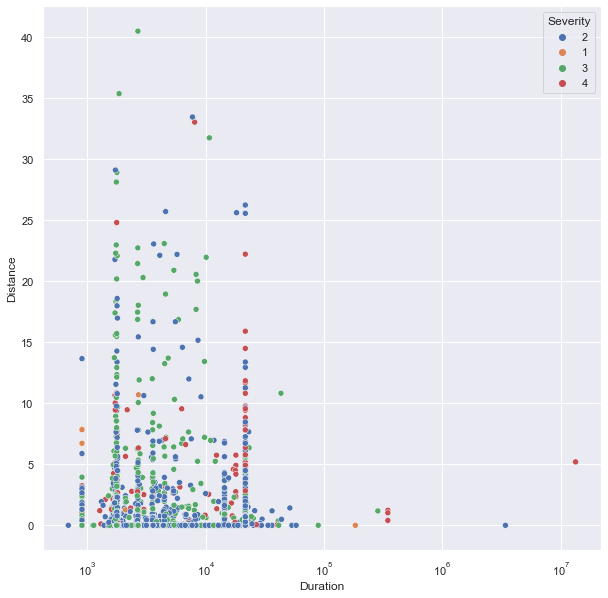

In [38]:
sns.set(rc = {"figure.figsize": (10, 10)})


sns.scatterplot(data=time_df, x="Duration", y="Distance", hue="Severity")
plt.xscale("log")
plt.show()